In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import date, datetime

from sklearn.metrics import confusion_matrix
from sklearn.metrics import normalized_mutual_info_score, mutual_info_score
from sklearn.feature_selection import mutual_info_regression

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline

from matplotlib import colors
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [64]:
sns.set_style("whitegrid")

In [65]:
str_state = 'GA'
file = 'agent_comments_sales_'+str_state


In [66]:
df_sales_predictors = pd.read_feather(file + '_model03.fea') 
df_Predictand = pd.read_feather(file + '_predictand2.fea') 

In [67]:
df_Transprice = pd.read_feather(file + '_Transprice.fea') 

In [68]:
avmvalue = df_sales_predictors['avmValue']

In [69]:
avmvalue

0         405972.57
1         244827.67
2         229674.21
3         143607.40
4         408971.22
            ...    
534373    444373.18
534374    212083.67
534375    157484.07
534376    193862.59
534377    191104.55
Name: avmValue, Length: 534378, dtype: float64

In [70]:
df_sales_predictors = df_sales_predictors.drop(columns = 'avmValue')

In [71]:
from sklearn.preprocessing import KBinsDiscretizer

In [72]:

nclasses = 20
discretizer = KBinsDiscretizer(n_bins=nclasses, encode='ordinal', strategy='uniform')


In [73]:

Series = df_Predictand['avmerror'].values

discretizer.fit(Series.reshape(-1,1))
Series_disctzd = discretizer.transform(Series.reshape(-1,1))

print(discretizer.bin_edges_[0])

[-4.99976000e-01 -4.49979738e-01 -3.99983476e-01 -3.49987215e-01
 -2.99990953e-01 -2.49994691e-01 -1.99998429e-01 -1.50002168e-01
 -1.00005906e-01 -5.00096442e-02 -1.33824757e-05  4.99828793e-02
  9.99791410e-02  1.49975403e-01  1.99971665e-01  2.49967926e-01
  2.99964188e-01  3.49960450e-01  3.99956712e-01  4.49952973e-01
  4.99949235e-01]


In [74]:
Series_disctzd

array([[ 7.],
       [11.],
       [10.],
       ...,
       [12.],
       [ 8.],
       [ 9.]])

In [183]:
predictor_array = df_sales_predictors.to_numpy()
predictor_array = predictor_array[:,105-np.arange(0,20)]
#predictor_array = predictor_array[:, -3:]
transform_predictors = MinMaxScaler(feature_range=(-6, 6)).fit(predictor_array)
predictor_array_transformed = transform_predictors.transform(predictor_array)
#predictor_array_transformed2 = transform_predictors.transform(predictor_array)
#predictor_array_transformed = predictor_array

In [184]:
type(predictor_array_transformed)

numpy.ndarray

In [185]:
predictor_array.shape

(534378, 20)

In [186]:
print(len(df_sales_predictors.columns))

106


In [187]:
Predictand = df_Predictand['avmerror'].values

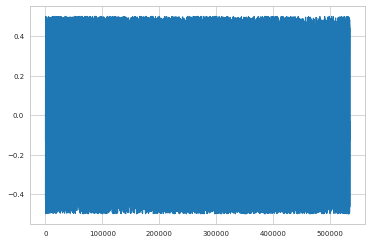

In [188]:
plt.plot(Predictand)

In [189]:
transform_predictand = MinMaxScaler(feature_range=(0, 1)).fit(Predictand.reshape(-1, 1))
Predictand_transformed = transform_predictand.transform(Predictand.reshape(-1, 1))

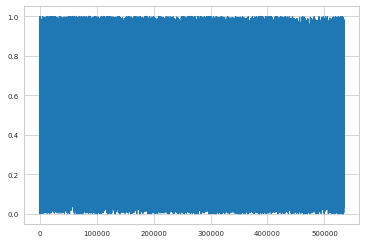

In [190]:
plt.plot(Predictand_transformed)

In [191]:

#cov_2 = np.dot (predictor_array_transformed, predictor_array_transformed.T)
#print(cov_2.shape)


In [192]:
predictor_array_transformed.shape

(534378, 20)

In [193]:
Predictand_transformed.shape

(534378, 1)

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
train_samples = 300_000  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    predictor_array_transformed,
    Series_disctzd,
    shuffle=False,
    test_size=len(Predictand_transformed) - train_samples,
)

In [196]:
y_train.shape

(300000, 1)

In [213]:
# Model definition

model_NN_Class = keras.Sequential()
model_NN_Class.add(keras.layers.Dense(15, activation='relu', input_dim=20))
model_NN_Class.add(keras.layers.Dense(5, activation='tanh'))
model_NN_Class.add(keras.layers.Dense(nclasses, activation='softmax'))


In [214]:
#model_NN_Class.compile(loss='mse', optimizer='adam')
model_NN_Class.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [215]:
y_train

array([[ 7.],
       [11.],
       [10.],
       ...,
       [13.],
       [ 5.],
       [ 9.]])

In [216]:
#y_train = y_train.reshape(1,-1)


In [217]:
#y_train

In [218]:
fit_history = model_NN_Class.fit(X_train, y_train, epochs=10, batch_size= 100)

Epoch 1/10
3000/3000 [==============================] - 8s 3ms/step - loss: 2.4704 - accuracy: 0.1754
Epoch 2/10
3000/3000 [==============================] - 8s 3ms/step - loss: 2.4430 - accuracy: 0.1776
Epoch 3/10
3000/3000 [==============================] - 8s 3ms/step - loss: 2.4416 - accuracy: 0.1786
Epoch 4/10
3000/3000 [==============================] - 8s 3ms/step - loss: 2.4410 - accuracy: 0.1782
Epoch 5/10
3000/3000 [==============================] - 8s 3ms/step - loss: 2.4407 - accuracy: 0.1785
Epoch 6/10
3000/3000 [==============================] - 8s 3ms/step - loss: 2.4403 - accuracy: 0.1784
Epoch 7/10
3000/3000 [==============================] - 8s 3ms/step - loss: 2.4401 - accuracy: 0.1783
Epoch 8/10
3000/3000 [==============================] - 8s 3ms/step - loss: 2.4395 - accuracy: 0.1788
Epoch 9/10
3000/3000 [==============================] - 8s 3ms/step - loss: 2.4396 - accuracy: 0.1792
Epoch 10/10
3000/3000 [==============================] - 8s 3ms/step - loss: 2.439

In [219]:
predictions = model_NN_Class.predict(X_train)

In [220]:
predictions

array([[0.0055246 , 0.0068316 , 0.00967633, ..., 0.00735875, 0.00528155,
        0.00366559],
       [0.00092143, 0.00146674, 0.00250858, ..., 0.03761442, 0.03205376,
        0.02575826],
       [0.00626043, 0.00755955, 0.0103925 , ..., 0.00756305, 0.0053783 ,
        0.00384207],
       ...,
       [0.00113868, 0.0018202 , 0.00281166, ..., 0.01352355, 0.01052738,
        0.00746474],
       [0.00570636, 0.0070079 , 0.00977192, ..., 0.00742315, 0.00530114,
        0.00372361],
       [0.00195246, 0.00288329, 0.00421467, ..., 0.00788271, 0.0058314 ,
        0.00388094]], dtype=float32)

In [221]:
#plt.contourf(predictions)

In [222]:
def convert_to_bin(bin_edges, probabilities):
    bins_center = (bin_edges[1:]+bin_edges[:-1])/2.
    bin_predicted = np.sum(bins_center*probabilities)
    return bin_predicted

In [223]:
idd = 4000
print(convert_to_bin(discretizer.bin_edges_[0], predictions[idd,:]))
print(Series[idd])

-0.027341796394188007
-0.056063780614004965


In [224]:
bin_all = np.zeros((np.shape(predictions)[0],2))

for iid in range(np.shape(predictions)[0]):
    #print(iid)
    bin_all[iid,0] = convert_to_bin(discretizer.bin_edges_[0], predictions[iid,:])
    bin_all[iid,1] = ((discretizer.bin_edges_[0][1:]+discretizer.bin_edges_[0][:-1])/2)[int(y_train[iid])]

In [225]:
discretizer.bin_edges_[0]

array([-4.99976000e-01, -4.49979738e-01, -3.99983476e-01, -3.49987215e-01,
       -2.99990953e-01, -2.49994691e-01, -1.99998429e-01, -1.50002168e-01,
       -1.00005906e-01, -5.00096442e-02, -1.33824757e-05,  4.99828793e-02,
        9.99791410e-02,  1.49975403e-01,  1.99971665e-01,  2.49967926e-01,
        2.99964188e-01,  3.49960450e-01,  3.99956712e-01,  4.49952973e-01,
        4.99949235e-01])

In [226]:
y_train.astype(int)

array([[ 7],
       [11],
       [10],
       ...,
       [13],
       [ 5],
       [ 9]])

In [227]:
bin_all

array([[-0.01304684, -0.12500404],
       [ 0.1111808 ,  0.07498101],
       [-0.01608685,  0.02498475],
       ...,
       [ 0.04246141,  0.17497353],
       [-0.01392165, -0.22499656],
       [ 0.01208727, -0.02501151]])

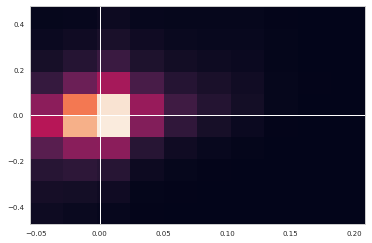

In [228]:
plt.hist2d(bin_all[:,0], bin_all[:,1])
plt.axhline(y=0, color='w')
plt.axvline(x=0, color='w')

In [229]:
trans_price = avmvalue.values[0:train_samples]/(1 - bin_all[:,0])
trans_price

array([400744.12509875, 275452.7236485 , 226037.9719256 , ...,
       182966.58960042, 202184.7748735 , 399550.16939096])

In [230]:
#print(np.mean(trans_price-df_Transprice['Transprice'].values[0:train_samples]))
#print(np.mean(avmvalue.values[0:train_samples]-df_Transprice['Transprice'].values[0:train_samples]))

In [231]:
#print(np.mean((df_Transprice['Transprice'].values[0:train_samples]-trans_price)/(df_Transprice['Transprice'].values[0:train_samples])))
#print(np.mean((df_Transprice['Transprice'].values[0:train_samples]-avmvalue.values[0:train_samples])/(df_Transprice['Transprice'].values[0:train_samples])))


In [232]:
print(np.mean((df_Transprice['Transprice'].values[0:train_samples]-trans_price)/(df_Transprice['Transprice'].values[0:train_samples])))
print(np.mean((df_Transprice['Transprice'].values[0:train_samples]-avmvalue.values[0:train_samples])/(df_Transprice['Transprice'].values[0:train_samples])))
#print(np.mean((df_Transprice['Transprice'].values[0:train_samples]-(avmvalue.values[0:train_samples]+trans_price)*0.5)/(df_Transprice['Transprice'].values[0:train_samples])))


0.0030824392329459956
0.011348422588271602


In [233]:
print(np.mean(np.abs(df_Transprice['Transprice'].values[0:train_samples]-trans_price)/(df_Transprice['Transprice'].values[0:train_samples])))
print(np.mean(np.abs(df_Transprice['Transprice'].values[0:train_samples]-avmvalue.values[0:train_samples])/(df_Transprice['Transprice'].values[0:train_samples])))
#print(np.mean(np.abs(df_Transprice['Transprice'].values[0:train_samples]-(avmvalue.values[0:train_samples]+trans_price)*0.5)/(df_Transprice['Transprice'].values[0:train_samples])))


0.1087701068883338
0.1106225181187301


In [234]:
#print(np.mean(np.abs(trans_price-df_Transprice['Transprice'].values[0:train_samples])))
#print(np.mean(np.abs(avmvalue.values[0:train_samples]-df_Transprice['Transprice'].values[0:train_samples])))

35096.7416158688
35486.31329106667


In [235]:

#coef*trans_price = trans_price - avmValue
#coef*trans_price - trans_price = - avmValue
#trans_price * (coef - 1) = - avmValue
#trans_price = avmValue/ (1 - coef)

In [236]:
#predictions = (predictions - predictions.min())
#predictions = predictions/(predictions.max()) *2. -1

In [237]:
predictions_test = model_NN_Class.predict(X_test)

In [238]:
bin_all_test = np.zeros((np.shape(predictions_test)[0],2))

for iid in range(np.shape(predictions_test)[0]):
    #print(iid)
    bin_all_test[iid,0] = convert_to_bin(discretizer.bin_edges_[0], predictions_test[iid,:])
    bin_all_test[iid,1] = ((discretizer.bin_edges_[0][1:]+discretizer.bin_edges_[0][:-1])/2)[int(y_test[iid])]

In [239]:
trans_price_test = avmvalue.values[train_samples:]/(1 - bin_all_test[:,0])
trans_price_test

array([ 58835.36441503, 186788.37173823, 193642.3581288 , ...,
       155729.57674239, 190806.97456223, 183953.98876485])

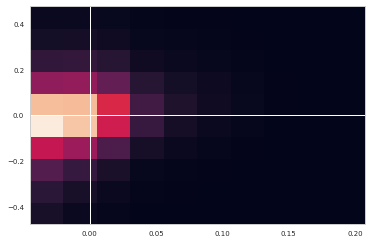

In [240]:
plt.hist2d(bin_all_test[:,0], bin_all_test[:,1])
plt.axhline(y=0, color='w')
plt.axvline(x=0, color='w')

In [241]:
print(np.mean((df_Transprice['Transprice'].values[train_samples:]-trans_price_test)/(df_Transprice['Transprice'].values[train_samples:])))
print(np.mean((df_Transprice['Transprice'].values[train_samples:]-avmvalue.values[train_samples:])/(df_Transprice['Transprice'].values[train_samples:])))


0.002045746285614439
-0.0017844952380493182


In [242]:
print(np.mean(np.abs(df_Transprice['Transprice'].values[train_samples:]-trans_price_test)/(df_Transprice['Transprice'].values[train_samples:])))
print(np.mean(np.abs(df_Transprice['Transprice'].values[train_samples:]-avmvalue.values[train_samples:])/(df_Transprice['Transprice'].values[train_samples:])))


0.11151238800730204
0.11276813732029965


In [243]:
df_Transprice['Transprice'].values[train_samples:].shape

(234378,)

In [244]:
trans_price_test.shape

(234378,)

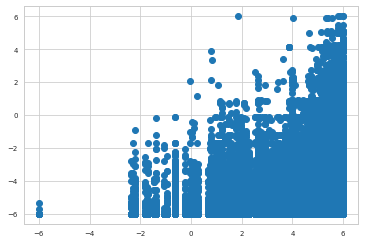

In [172]:
plt.plot(predictor_array_transformed[:,0],predictor_array_transformed[:,-2],'o')

In [30]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)